# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Set Validation features

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

25


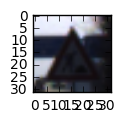

In [3]:
### Data exploration visualization goes here.

import random
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

## Preprocess Data

Shuffle the training data.

In [4]:
### Preprocess the data here.

from sklearn.utils import shuffle

# Implement Min-Max scaling for image data
def normalize(image_data):
    a = 0.01
    b = 0.99
    color_min = 0.0
    color_max = 255.0
    return a + ( ( (image_data - color_min) * (b - a) )/(color_max - color_min))

# Normalize train features and test features
X_train = normalize(X_train)
X_test = normalize(X_test)

X_train, y_train = shuffle(X_train, y_train)

In [5]:
from sklearn.model_selection import train_test_split

X_train = np.append(X_train, X_test, axis=0)
y_train = np.append(y_train, y_test, axis=0)

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train,
    y_train,
    test_size=0.02,
    random_state=42)

## Setup TensorFlow

The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

## Implement LeNet-5

Implement the LeNet-5 neural network architecture.

### Input

The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since the images are color, C is 3 in this case.

### Architecture

Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 43 outputs.

### Output

Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

model_name = 'lenet_report'

EPOCHS = 40
BATCH_SIZE = 120

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.01
    keep_prob = 1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels

Train LeNet to classify input data.

x is a placeholder for a batch of input images. 
y is a placeholder for a batch of output labels.

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [8]:
### Train your model here.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation) 

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [9]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples 

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './models/'+model_name)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.286

EPOCH 2 ...
Validation Accuracy = 0.431

EPOCH 3 ...
Validation Accuracy = 0.481

EPOCH 4 ...
Validation Accuracy = 0.600

EPOCH 5 ...
Validation Accuracy = 0.740

EPOCH 6 ...
Validation Accuracy = 0.805

EPOCH 7 ...
Validation Accuracy = 0.868

EPOCH 8 ...
Validation Accuracy = 0.881

EPOCH 9 ...
Validation Accuracy = 0.928

EPOCH 10 ...
Validation Accuracy = 0.937

EPOCH 11 ...
Validation Accuracy = 0.940

EPOCH 12 ...
Validation Accuracy = 0.946

EPOCH 13 ...
Validation Accuracy = 0.949

EPOCH 14 ...
Validation Accuracy = 0.955

EPOCH 15 ...
Validation Accuracy = 0.952

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.959

EPOCH 18 ...
Validation Accuracy = 0.960

EPOCH 19 ...
Validation Accuracy = 0.969

EPOCH 20 ...
Validation Accuracy = 0.960

EPOCH 21 ...
Validation Accuracy = 0.962

EPOCH 22 ...
Validation Accuracy = 0.969

EPOCH 23 ...
Validation Accuracy = 0.973

EPOCH 24 ...
Validation Accura

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

### For pre-processing Min-Max normalization. Where I normalized test and train data. I normalized the data in the image by coverting all 0 - 255 values to 0 - 1, by doing this we can achieve close to 0 mean and equal variance.

### Also, I didn't convert image to greyscale inorder to retain all the properties of 3 channels so that I can extract more information when doing convolution.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

### I used test and train split function to split training data as train and validate data. I am using 20% of train data for validation. This is necessary as we need to validate the training so that we can measure the prediction accuracy after training.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### I reused the LeNet lab, which is LeNet-5 neural network architecture.

### Five layers looks as below, 

Layer 1: Convolutional. The output shape is 28x28x6.

Activation. I am using RELU activation layer.

Pooling. I am using Max Pooling which outputs the shape 14x14x6.

Layer 2: Convolutional. The output shape is 10x10x16.

Activation. I am using RELU activation layer.

Pooling. I am using Max Pooling which outputs the shape 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. I do is by using 
tf.contrib.layers.flatten.

Layer 3: Is a Fully Connected layer with 120 outputs.

Activation. I am using RELU activation layer.

Layer 4: Is a Fully Connected layer with 84 outputs.

Activation. I am using RELU activation layer.

Layer 5: Fully Connected (Logits) with 43 outputs.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### The EPOCH and BATCH_SIZE values affect the training speed and model accuracy. I tried various combinations of epochs, batch size and learning rate. Finally I got an accuracy of 98% with 40 Epochs, Batch Size of 150 and learning rate of 0.01. I didn't modify any other hyperparameters. Even though I tried dropout of 0.5 it didn't yield me  good results.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

### I followed LeNet architecture approach discussed in the convolutional neural networks. I followed this approach as it looked more efficient method of training. I spent lot of time trying to improve training accuracy. Some preprocessing like normalizing the input, then I used LeNet involving convolution network, RELU, MAX Pooling. I spent lot of time tuning the hyperparamters like dropout, standard deviation etc.., Also I tried different combinations of Epochs, Learning rate and Batch size. After getting training accuracy of 98% I think my approach is good enough for this project.

In [11]:
with tf.Session() as sess:
    print ('loading '+model_name+'...')
    saver.restore(sess,   './models/'+model_name)
    print('loaded')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

loading lenet_report...
loaded
Test Accuracy = 0.980


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I have used 9 images (Thanks to Tyler Lanigan for the images). 

A summary of the test signs and their categories is shown in the following table:

| Test Image | Sign Category            |
|------------|--------------------------|
| 1          | Wild Animals Crossing - ?|
| 2          | Bicycles crossing - 29   |
| 3          | Children Crossing - 28   |
| 4          | Turn Right ahead - 33    |
| 5          | Speed limit (80km/h) - 5 |
| 6          | Stop - 14                |
| 7          | General Caution - 18     |
| 8          | No Entry - 17            |
| 9          | Turn Left ahead - 34     |

### Among these, first image is not in any of the sign category and few images are not in the dataset. Hence it makes it difficult for the model to classify. But I am expecting close guess for those! 

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# load test images
from skimage import io
import numpy as np
import os

images = os.listdir("testImages/")
images.sort()
num_imgs = len(images)
test_imgs = np.uint8(np.zeros((num_imgs,32,32,3)))
labels = ['?', 29, 28, 33, 5, 14, 18, 17, 34]

for i, j in enumerate(images):
    image = io.imread('./testImages/'+j)
    test_imgs[i] = image

# Normalize train features and test features
test_imgs = normalize(test_imgs.reshape((-1, 32, 32, 3)).astype(np.float32))

['?', 29, 28, 33, 5, 14, 18, 17, 34]


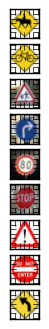

(9, 32, 32, 3)

In [13]:
import  matplotlib.pyplot as plt
f, ax = plt.subplots(num_imgs, 1)
for i in range(num_imgs):
    ax[i].imshow(test_imgs[i])
    plt.setp(ax[i].get_xticklabels(), visible=False)
    plt.setp(ax[i].get_yticklabels(), visible=False)

plt.show()
test_imgs.shape

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

### As seen in the result below, we can see that images 3, 4, 5, 6, 7, 8 are predicted correctly. Label for first image is not there in the csv file provided. 2 and 9 are not predicted properly. So our model has an accuracy of 75 percent [(6/8)*100]. This is expected as few images are not in our dataset. However, my accuracy is much lesser than test accuracy which is 0.98. Model can be further improved by adding more layers in LeNet or using better architecture like Keras, or simply by removing explicit learning rate and asking Adam Optimizer to choose one!!!

In [17]:
import tensorflow as tf

model_name = 'lenet_report'

predictions = tf.nn.softmax(logits)

def classify_images(X_data):
    sess = tf.get_default_session()
    pred_vals = sess.run(predictions, feed_dict={x: X_data})
    return pred_vals
    
with tf.Session() as sess:
    print ('loading '+model_name+'...')
    saver.restore(sess, './models/'+model_name)
    predictions = classify_images(test_imgs)
    top_k = sess.run(tf.nn.top_k(predictions, 5, sorted=True))
    print("Predicted Labels:", np.argmax(predictions, 1))
    print("Expected Labels: ", labels)

loading lenet_report...
Predicted Labels: [ 8  1 28 33  5 14 18 17  0]
Expected Labels:  ['?', 29, 28, 33, 5, 14, 18, 17, 34]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

### Of the 5 visualized predictions, the model incorrectly predicted first and second. The first prediction is for a picture of a horse crossing the road. As there is no "horse crossing" sign in the German traffic Sign dataset, it is expected that the model will have trouble identifying it, however, I would consider a correct prediction to be Wild Animal crossing, or class number 31. 

### According to the above visualization, in all five cases, neural network model makes its first choice with the highest probability (almost 100 percent) and other four choices are almost negligible. For me, it looks like a little bit of warning. Hence, further investigation should be made to understand this behaviour.

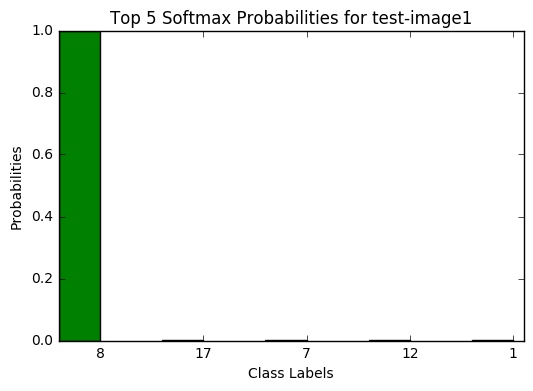

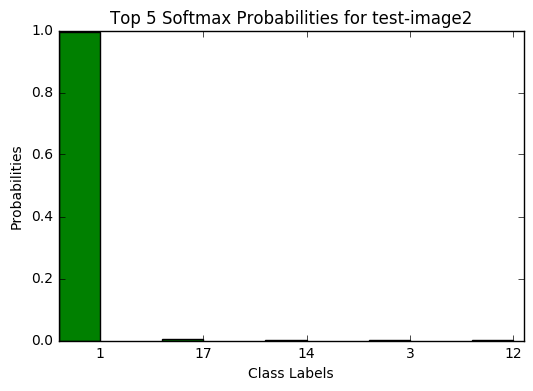

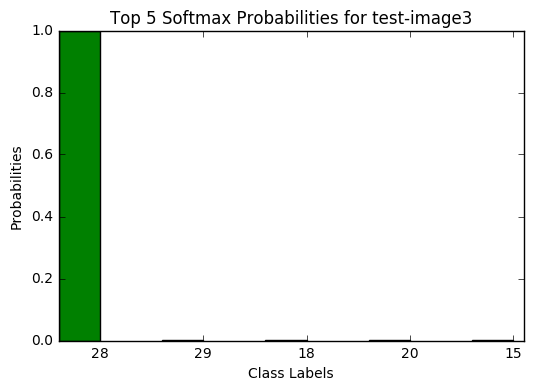

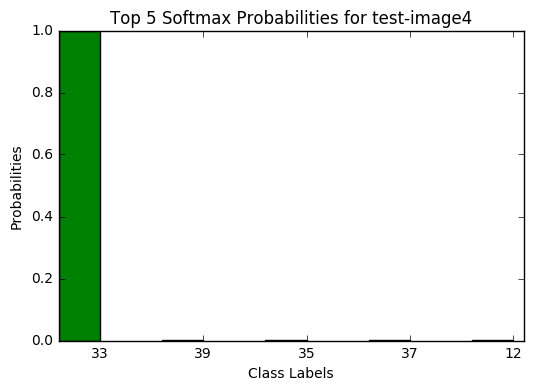

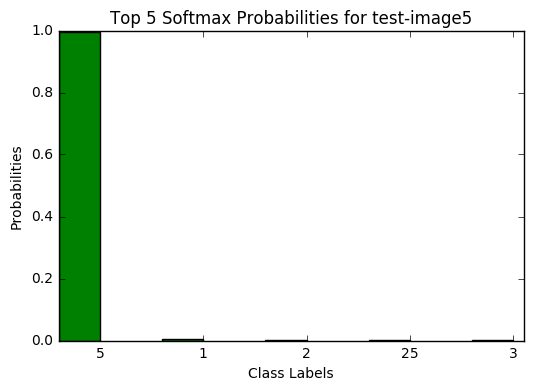

In [18]:
N = 5

ind = np.arange(N)  # the x locations for the values

for i in range(5):
    plt.figure(i)
    values = top_k[0][i]
    plt.bar(range(N), values, 0.40, color='g')
    plt.ylabel('Probabilities')
    plt.xlabel('Class Labels')
    plt.title('Top {} Softmax Probabilities for test-image{}'.format(N, str(i+1)))
    plt.xticks(ind+0.40, tuple(top_k[1][i]))

plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.